The structure of this notebook is:


1.   Importing and visualizing data
2.   Hurst Exponent
3.   Detrended Fluctuation Analysis (DFA)
4.   Which is the most complex class? - Based on Hurst Exponent and DFA


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
colors = plt.rcParams["axes.prop_cycle"]()

In [2]:
fractal_df = pd.read_csv('intern_dataset.csv')

In [3]:
fractal_df.head()

,Time,Signal1,Signal2,Label
0,2017-08-14 11:37:49.791,33668.091913,0.856726,A
1,2017-08-14 11:37:49.801,32564.903040,0.856705,A
2,2017-08-14 11:37:49.811,31454.043305,0.856683,A
3,2017-08-14 11:37:49.821,30335.387166,0.856659,A
4,2017-08-14 11:37:49.831,29207.142938,0.856634,A


In [4]:
# Creating dataframe for each signal and each label separately
signal1_A = fractal_df[fractal_df['Label']=='A']['Signal1']
signal1_B = fractal_df[fractal_df['Label']=='B']['Signal1']
signal1_C = fractal_df[fractal_df['Label']=='C']['Signal1']
signal2_A = fractal_df[fractal_df['Label']=='A']['Signal2']
signal2_B = fractal_df[fractal_df['Label']=='B']['Signal2']
signal2_C = fractal_df[fractal_df['Label']=='C']['Signal2']

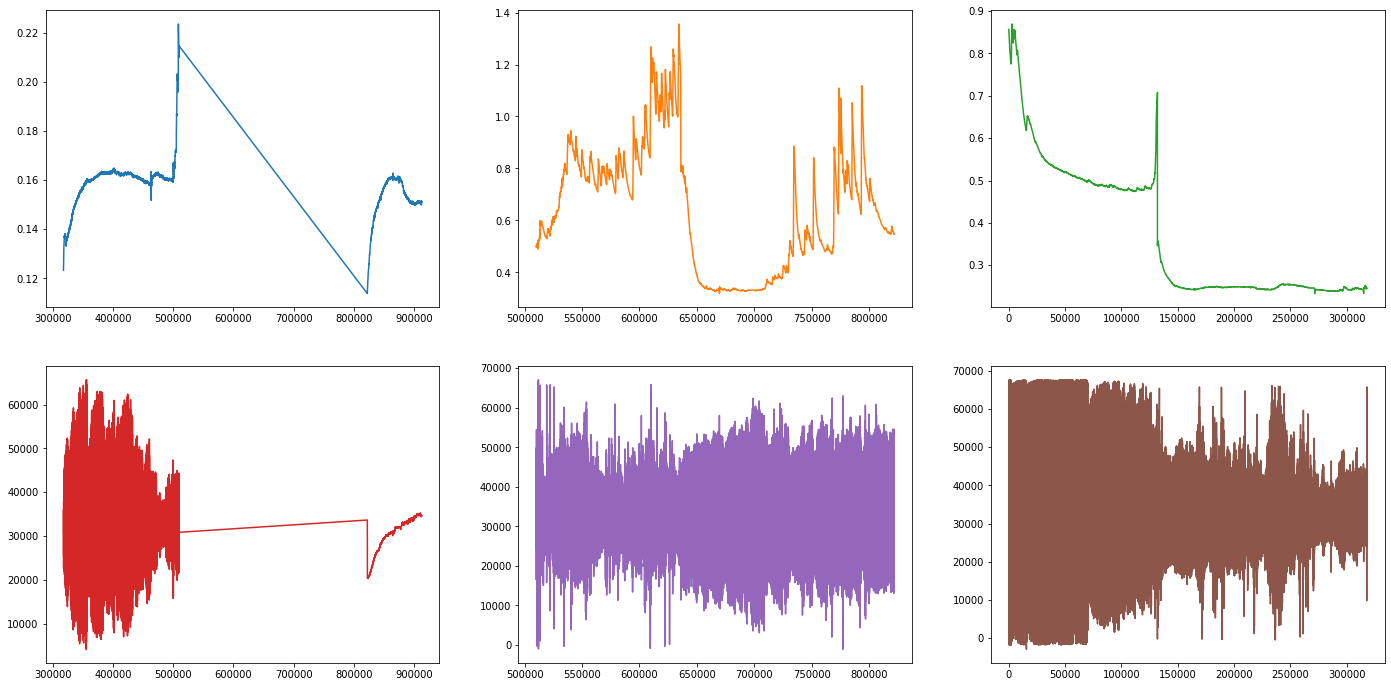

In [5]:
fig, axes = plt.subplots(2, 3, figsize=(24, 12))
df_list = [signal1_A, signal1_B, signal1_C, signal2_A, signal2_B, signal2_C]
for i in range(2):
  for j in range(3):
    axes[i][j].plot(df_list.pop(), c = next(colors)["color"])
fig.show()

**HURST EXPONENT**

In [6]:
# My own hurst exponent calculation function
# It is based on rescaled range or R/S algorithm
# It takes as input the signal and the upper range of division for the window size
# It returns as output a list containing the slope, intercept, standard error, window size array, rescaled range array

def hurst_exponent(signal, upper_range):
  N = len(signal)
  subarr_size = [N//(2**i) for i in range(1, upper_range)]
  rescaled_range = []
  for size in subarr_size:
    r_s = []
    hurst_arr = []
    [hurst_arr.append(signal[i:i+size]) for i in range(0, N - size + 1, size)]
    for h in hurst_arr:
      sub_arr = h - np.mean(h)
      cummulative = np.cumsum(sub_arr)
      r = np.max(cummulative) - np.min(cummulative)
      sd = np.std(h)
      r_s.append(r/sd)
    rescaled_range.append(np.mean(r_s))
  
  m, err = np.polyfit(np.log(subarr_size), np.log(rescaled_range), 1, cov=True)
  return [m[0], m[1], err, np.log(subarr_size), np.log(rescaled_range)]

In [7]:
# Calculating Hurst exponent for each class of each signal and storing the output in a dictionary
hurst_dict = {}
hurst_dict['signal1_A'] = hurst_exponent(signal1_A, 15)
hurst_dict['signal1_B'] = hurst_exponent(signal1_B, 15)
hurst_dict['signal1_C'] = hurst_exponent(signal1_C, 15)
hurst_dict['signal2_A'] = hurst_exponent(signal2_A, 15)
hurst_dict['signal2_B'] = hurst_exponent(signal2_B, 15)
hurst_dict['signal2_C'] = hurst_exponent(signal2_C, 15)

In [8]:
# Let's have a better look at what a key of hurst_dict contains
hurst_dict['signal1_A']

[0.567575333488915, 0.7307908480998166, array([[ 0.00017901, -0.00133669],
        [-0.00133669,  0.01138436]]), array([11.97665948, 11.2835123 , 10.59036512,  9.89721794,  9.20402044,
         8.51077262,  7.81762544,  7.12447826,  6.43133108,  5.7365723 ,
         5.04342512,  4.34380542,  3.63758616,  2.94443898]), array([7.57579304, 7.14447283, 6.74066983, 6.27800877, 5.91654212,
        5.52318944, 5.17431876, 4.73343275, 4.30522683, 4.01510851,
        3.74195083, 3.51781089, 2.80074682, 2.09915351])]

['signal1_A', 'signal1_B', 'signal1_C', 'signal2_A', 'signal2_B', 'signal2_C']


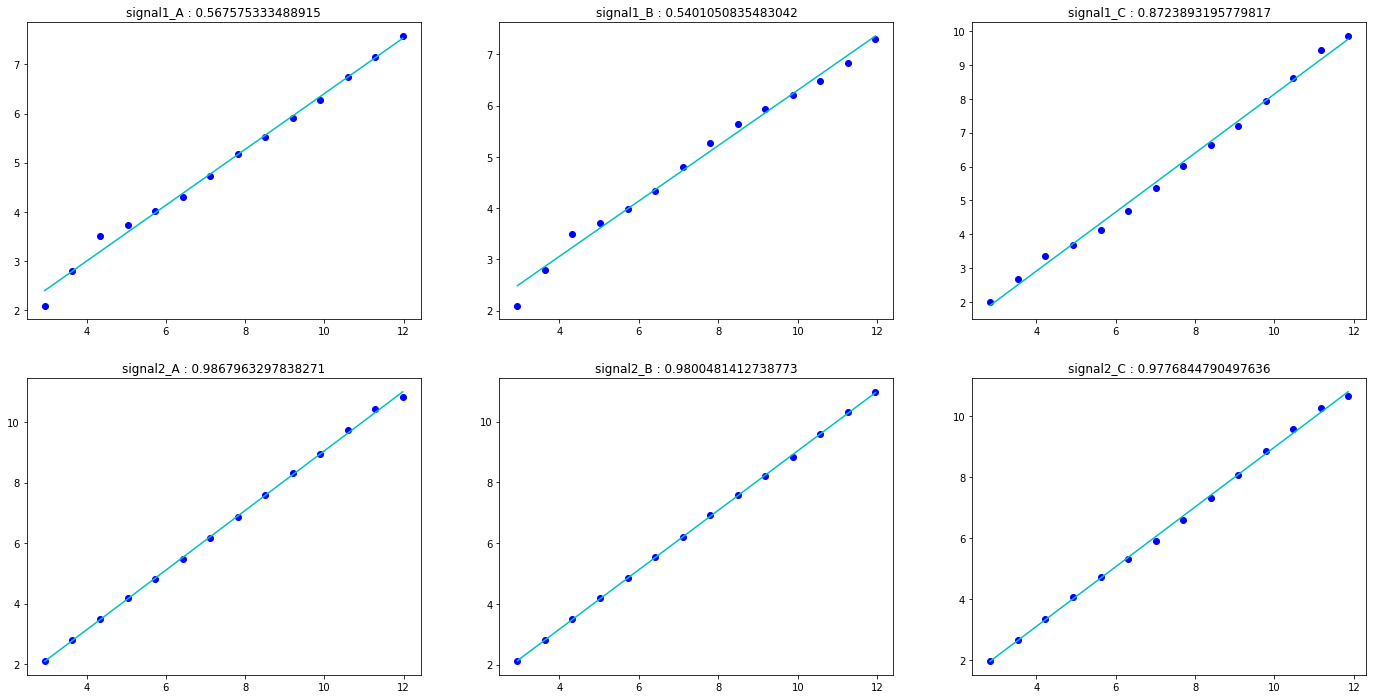

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(24, 12))
keys = list(hurst_dict.keys())
print(keys)
for i in range(2):
  for j in range(3):
    idx = keys.pop(0)
    m = hurst_dict[idx][0]
    b = hurst_dict[idx][1]
    x = hurst_dict[idx][3]
    y = hurst_dict[idx][4]
    axes[i][j].plot(x, y, 'ob')
    axes[i][j].plot(x, m*x + b, 'c')
    axes[i][j].set_title(f'{idx} : {m}')
fig.show()

In [10]:
# Hurst Exponent Values
for key, value in hurst_dict.items():
  print(f'{key}: {value[0]}')

signal1_A: 0.567575333488915
signal1_B: 0.5401050835483042
signal1_C: 0.8723893195779817
signal2_A: 0.9867963297838271
signal2_B: 0.9800481412738773
signal2_C: 0.9776844790497636


In [ ]:
! pip install nolds

**DETRENDED FLUCTUATION ANALYSIS**

In [12]:
# I came across an amazing package "nolds" that contains dfa and thought to use that!!
from nolds import dfa

In [13]:
dfa_dict = {}
dfa_dict['signal1_A'] = dfa(signal1_A, debug_data=True)
dfa_dict['signal1_B'] = dfa(signal1_B, debug_data=True)
dfa_dict['signal1_C'] = dfa(signal1_C, debug_data=True)
dfa_dict['signal2_A'] = dfa(signal2_A, debug_data=True)
dfa_dict['signal2_B'] = dfa(signal2_B, debug_data=True)
dfa_dict['signal2_C'] = dfa(signal2_C, debug_data=True)

In [14]:
# Let's have a look at what it returns
# The returned data format is actually: (slope, (window sizes array, rms values, [slope, intercept]))
dfa_dict['signal1_A']

(0.5609788682639137,
 (array([ 1.38629436,  1.60943791,  1.79175947,  2.07944154,  2.19722458,
          2.39789527,  2.63905733,  2.83321334,  2.99573227,  3.17805383,
          3.36729583,  3.55534806,  3.73766962,  3.93182563,  4.11087386,
          4.29045944,  4.47733681,  4.66343909,  4.84418709,  5.03043792,
          5.21493576,  5.39362755,  5.5759491 ,  5.75890177,  5.94279938,
          6.12468339,  6.30809844,  6.49072353,  6.67329797,  6.8554088 ,
          7.03790596,  7.22037384,  7.40245152,  7.58477308,  7.767264  ,
          7.94979722,  8.13211877,  8.31434234,  8.49678638,  8.67914196,
          8.86135011,  9.04369529,  9.22611529,  9.40837122,  9.59076114,
          9.77303712,  9.95536817, 10.13768973, 10.32002447]),
  array([ 6.10365424,  6.61847279,  7.01758109,  7.62510648,  7.86873333,
          8.27902104,  8.76586552,  9.15299613,  9.47256299,  9.82655085,
         10.184138  , 10.52742764, 10.8440222 , 11.15815028, 11.42043486,
         11.65202417, 11.829

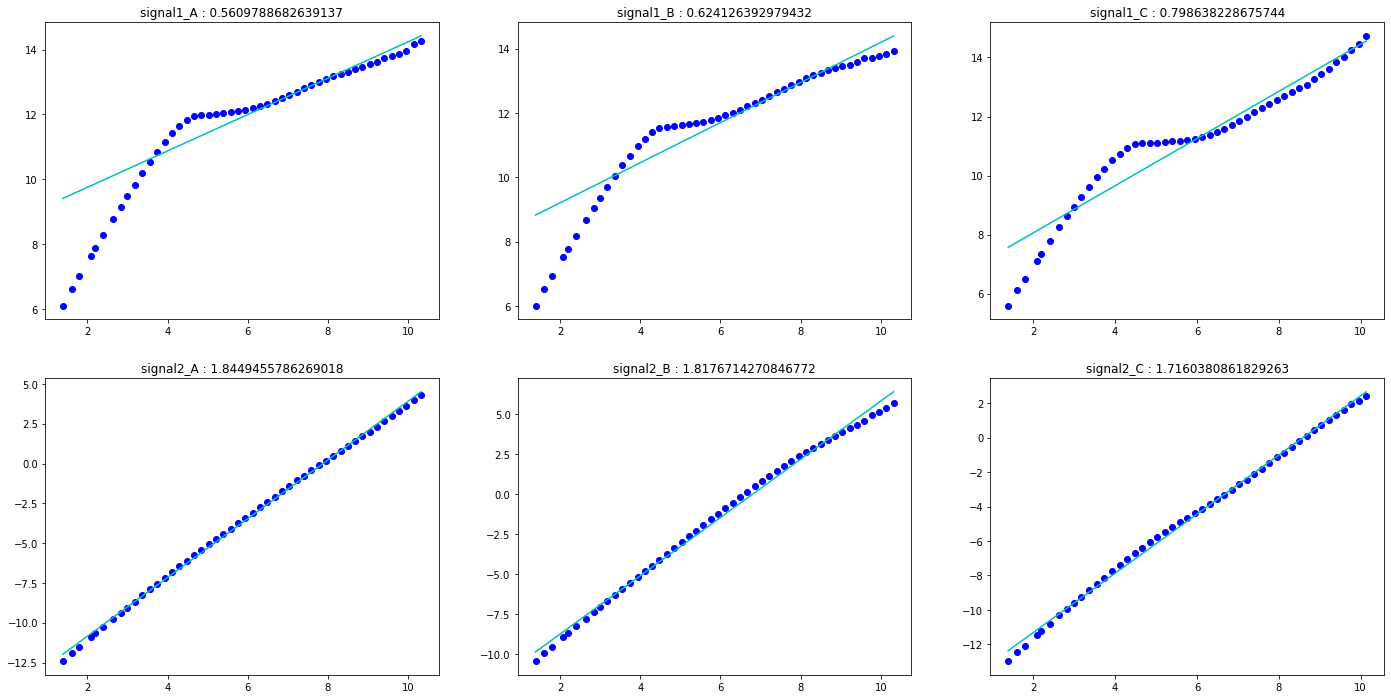

In [15]:
fig, axes = plt.subplots(2, 3, figsize=(24, 12))
keys = list(dfa_dict.keys())
for i in range(2):
  for j in range(3):
    idx = keys.pop(0)
    m = dfa_dict[idx][0]
    b = dfa_dict[idx][1][2][1]
    x = dfa_dict[idx][1][0]
    y = dfa_dict[idx][1][1]
    axes[i][j].plot(x, y, 'ob')
    axes[i][j].plot(x, m*x + b, 'c')
    axes[i][j].set_title(f'{idx} : {m}')
fig.show()

In [16]:
# DFA Values
for key, value in dfa_dict.items():
  print(f'{key}: {value[0]}')

signal1_A: 0.5609788682639137
signal1_B: 0.624126392979432
signal1_C: 0.798638228675744
signal2_A: 1.8449455786269018
signal2_B: 1.8176714270846772
signal2_C: 1.7160380861829263


**FINAL ANALYSIS:**

**1. Based on DFA:**
Higher the slope (DFA value), higher is the complexity of the system. Class C has slope of 0.79 for Signal1, i.e. class C has highest DFA value(highest slope) which indicates it is the most complex class for Signal1. For Signal2, all the classes have similar DFA value, but class A has most DFA value. Still, signal2 is not conclusive for complexity but from signal1, I can say that:
**Class C is the most complex class**.

**2. Based on Hurst Exponent:**
For all classes of all signals, the hurst exponent is more than 0.5, which means that the time series is persistent. The more closer the value of Hurst exponent to 1, the more complex the time series would be. For Signal2, Hurst exponent has very similar values for all classes. From Signal1 we find that **Class A and B both have very similar and least Hurst exponent. Class C has highest Hurst exponent of 0.7986. So class C is most complex class from Hurst exponent analysis**.